In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset_file="train.csv"

df=pd.read_csv(dataset_file,encoding="ISO-8859-1")

In [3]:
df.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,?,26.5,2.710,y,p,?,?,0.085,f,f,0,f,s,80,0,-


In [4]:
df=df.replace(to_replace='?', value=-9999)
df=df.dropna()
df=df.drop_duplicates()

# Here, I use another data frame
# In these example we take different criteria to classify whether we need to approve credit card or not.

df1=df[['Age','Debt','Employed','YearsEmployed','CreditScore','Income','Approved']]

In [5]:
#print(df1.head())
#print(df1.tail())
df1=df1.dropna()
df1=df1.drop_duplicates()
print(df1.isnull().sum())
print(df1.isnull().values.any())

Age              0
Debt             0
Employed         0
YearsEmployed    0
CreditScore      0
Income           0
Approved         0
dtype: int64
False


In [6]:
X1=np.array(df1.CreditScore)
X2=np.array(df1.Debt)
X3=np.array(df1.Income)
X4=np.array(df1.Age)
X5=np.array(df1.Employed)
X6=np.array(df1.YearsEmployed)
y=np.array(df1.Approved)

print(len(X1))
print(len(X2))
print(len(X3))
print(len(X4))
print(len(X5))
print(len(X6))
print(len(y))

589
589
589
589
589
589
589


In [7]:
print(X2.shape)
print(y.shape)

y=y.reshape((y.shape[0],1))

print(y.shape)

(589,)
(589,)
(589, 1)


In [8]:
encode=LabelEncoder()
encode.fit(df1.Employed)
X5=encode.transform(df1.Employed)

In [9]:
Xs1=np.empty((X1.shape[0],3))#X.reshape(590,3)
Xs2=np.empty((X2.shape[0],3))
Xs3=np.empty((X3.shape[0],3))
Xs4=np.empty((X4.shape[0],3))
Xs5=np.empty((X5.shape[0],3))
Xs6=np.empty((X6.shape[0],3))

#Xs1=[data for data in X1]
for i in range(len(X1)):
    Xs1[i]=X1[i]
    
for i in range(len(X2)):
    Xs2[i]=X2[i]
    
for i in range(len(X3)):
    Xs3[i]=X3[i]

for i in range(len(X4)):
    Xs4[i]=X4[i]

for i in range(len(X5)):
    Xs5[i]=X5[i]
    
for i in range(len(X6)):
    Xs6[i]=X6[i]

In [10]:
print(Xs2.shape)
print(y.shape)

(589, 3)
(589, 1)


In [11]:
encoder=LabelEncoder()
encoder.fit(df1.Approved)
y=encoder.transform(df1.Approved)
y=y.reshape((y.shape[0],1))

In [12]:
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.models import Sequential
from keras import Input, Model
from keras.layers import concatenate

def create_mod(dim):
    model=Sequential()
    model.add(Dense(16,activation='tanh',input_dim=dim))
    model.add(Dropout(0.1))
    #model.add(Dense(16,activation='tanh'))
    #model.add(Dropout(0.05))
    model.add(Dense(8,activation='tanh'))
    model.add(Dropout(0.05))
    #model.add(Dropout(0.025))
    return model

# we have these 6 models as input and we need to concate it

X_train1=create_mod(3)
X_train2=create_mod(3)
X_train3=create_mod(3)
X_train4=create_mod(3)
X_train5=create_mod(3)
X_train6=create_mod(3)
Xs=concatenate([X_train1.output,X_train2.output,X_train3.output,X_train4.output,X_train5.output,X_train6.output])
print(Xs.shape)

tr=Dense(4,activation='tanh')(Xs)
tr=Dense(1,activation='sigmoid')(tr)
model=Model(inputs=[X_train1.input,X_train2.input,X_train3.input,X_train4.input,X_train5.input,X_train6.input],outputs=tr)
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(?, 48)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
dense_1_input (InputLayer)      (None, 3)            0                                            
__________________________________________________________________________________________________
dense_3_input (InputLayer)      (None, 3)            0                                            
__________________________________________________________________________________________________
dense_5_input (InputLayer)      (None, 3)            0                                            
__________________________________________________________________________________________________
dense_7_input

In [13]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#model.compile(loss='hinge',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit([Xs1,Xs2,Xs3,Xs4,Xs5,Xs6],y,epochs=10,batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
589/589 [==============================] - 7s 11ms/step - loss: 0.5844 - acc: 0.7470
Epoch 2/10
589/589 [==============================] - 0s 388us/step - loss: 0.5293 - acc: 0.7708
Epoch 3/10
589/589 [==============================] - 0s 387us/step - loss: 0.5186 - acc: 0.7759
Epoch 4/10
589/589 [==============================] - 0s 386us/step - loss: 0.5004 - acc: 0.7878
Epoch 5/10
589/589 [==============================] - 0s 368us/step - loss: 0.4961 - acc: 0.7878
Epoch 6/10
589/589 [==============================] - 0s 433us/step - loss: 0.4873 - acc: 0.7844
Epoch 7/10
589/589 [==============================] - 0s 382us/step - loss: 0.4800 - acc: 0.7827
Epoch 8/10
589/589 [==============================] - 0s 369us/step - loss: 0.4787 - acc: 0.7912
Epoch 9/10
589/589 [==============================] - 0s 395us/step - loss: 0.4665 - acc: 0.7963
Epoch 10/10
589/589 [==============================] - 0s 366us/step - loss: 0.4

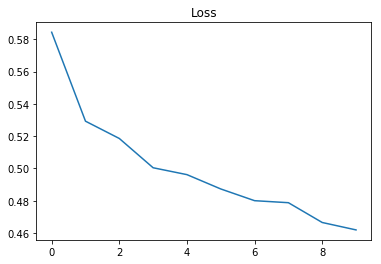

In [14]:
plt.title('Loss')
plt.plot(history.history['loss'])

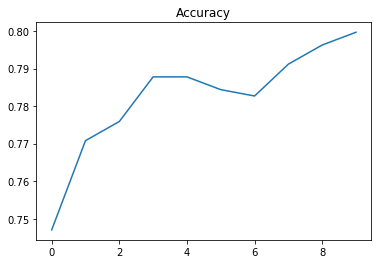

In [15]:
plt.title('Accuracy')
plt.plot(history.history['acc'])

In [16]:
df_test=pd.read_csv("test.csv")

df_test_1=df_test[['Age','Debt','Employed','YearsEmployed','CreditScore','Income']]

In [17]:
X_test1=np.array(df_test_1.CreditScore)
X_test2=np.array(df_test_1.Debt)
X_test3=np.array(df_test_1.Income)
X_test4=np.array(df_test_1.Age)
X_test5=np.array(df_test_1.Employed)
X_test6=np.array(df_test_1.YearsEmployed)

X_t1=np.empty((X_test1.shape[0],3))
X_t2=np.empty((X_test2.shape[0],3))
X_t3=np.empty((X_test3.shape[0],3))
X_t4=np.empty((X_test4.shape[0],3))
X_t5=np.empty((X_test5.shape[0],3))
X_t6=np.empty((X_test6.shape[0],3))
for x in range(len(X_test1)):
    X_t1[x]=X_test1[x]

for x in range(len(X_test2)):
    X_t2[x]=X_test2[x]

for x in range(len(X_test3)):
    X_t3[x]=X_test3[x]

for x in range(len(X_test4)):
    X_t4[x]=X_test4[x]

encode=LabelEncoder()
encode.fit(df_test_1.Employed)
X_test5=encode.transform(df_test_1.Employed)

for x in range(len(X_test5)):
    X_t5[x]=X_test5[x]

for x in range(len(X_test6)):
    X_t6[x]=X_test6[x]


scores=model.predict([X_t1,X_t2,X_t3,X_t4,X_t5,X_t6],verbose=1,batch_size=10)

100/100 [==============================] - 1s 7ms/step


In [18]:
print(scores[0:10])

[[0.8352897 ]
 [0.82426757]
 [0.5792928 ]
 [0.8730793 ]
 [0.84884965]
 [0.6922086 ]
 [0.838958  ]
 [0.8769736 ]
 [0.83586514]
 [0.87768394]]


In [19]:
model.save('credit_card_ae.h5')